In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
import seaborn as sns

In [59]:
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [60]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [61]:
df.shape

(145460, 23)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [63]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
print (categorical)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [64]:
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)

In [65]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [66]:
for col in df.columns:
    df[col] = df[col].fillna(method='ffill')

In [67]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop(['Date'],axis=1,inplace=True)

In [68]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,Month,day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


## EDA -- 

In [69]:
y = df['RainTomorrow']
X = df.drop(['RainTomorrow'],axis = 1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [71]:
X_train.shape, X_test.shape

((116368, 20), (29092, 20))

In [72]:
X_train['RainToday']

22926      No
80735      No
121764    Yes
139821     No
1867      Yes
         ... 
41993      No
97639      No
95939      No
117952    Yes
43567      No
Name: RainToday, Length: 116368, dtype: object

In [73]:
y.unique()

array(['No', 'Yes'], dtype=object)

## Categorical to numerical

In [74]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'Month',
 'day']

In [75]:
encoder = ce.BinaryEncoder(cols=['RainToday'],return_df = True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [78]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
X_train['Location'] = encoder.fit_transform(X_train['Location'])
X_test['Location'] = encoder.transform(X_test['Location'])
X_train['WindGustDir'] = encoder.fit_transform(X_train['WindGustDir'])
X_test['WindGustDir'] = encoder.transform(X_test['WindGustDir'])
X_train['WindDir9am'] = encoder.fit_transform(X_train['WindDir9am'])
X_test['WindDir9am'] = encoder.transform(X_test['WindDir9am'])
X_train['WindDir3pm'] = encoder.fit_transform(X_train['WindDir3pm'])
X_test['WindDir3pm'] = encoder.transform(X_test['WindDir3pm'])

X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,year,Month,day
22926,27,18.8,23.7,0.2,2,52.0,2,2,31.0,28.0,...,73.0,1016.6,1013.9,21.4,22.2,0,1,2014,3,12
80735,44,9.3,24.0,0.2,4,48.0,6,5,13.0,24.0,...,55.0,1018.3,1014.6,14.3,23.2,0,1,2016,10,6
121764,31,10.9,22.2,1.4,12,26.0,4,12,0.0,11.0,...,47.0,1017.6,1014.9,16.6,21.5,1,0,2011,8,31
139821,13,19.3,29.9,0.0,2,43.0,2,0,26.0,17.0,...,37.0,1015.9,1012.1,23.2,29.1,0,1,2010,6,11
1867,2,15.7,17.6,12.4,0,20.0,2,0,11.0,13.0,...,100.0,1015.2,1010.5,16.5,17.3,1,0,2014,4,10


In [79]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,year,Month,day
22926,27,18.8,23.7,0.2,2,52.0,2,2,31.0,28.0,...,73.0,1016.6,1013.9,21.4,22.2,0,1,2014,3,12
80735,44,9.3,24.0,0.2,4,48.0,6,5,13.0,24.0,...,55.0,1018.3,1014.6,14.3,23.2,0,1,2016,10,6
121764,31,10.9,22.2,1.4,12,26.0,4,12,0.0,11.0,...,47.0,1017.6,1014.9,16.6,21.5,1,0,2011,8,31
139821,13,19.3,29.9,0.0,2,43.0,2,0,26.0,17.0,...,37.0,1015.9,1012.1,23.2,29.1,0,1,2010,6,11
1867,2,15.7,17.6,12.4,0,20.0,2,0,11.0,13.0,...,100.0,1015.2,1010.5,16.5,17.3,1,0,2014,4,10


In [80]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,year,Month,day
138175,3,21.9,39.4,1.6,6,57.0,4,3,20.0,33.0,...,26.0,1008.5,1004.1,29.8,35.4,1,0,2014,12,3
38638,42,20.5,37.5,0.0,14,59.0,1,3,17.0,20.0,...,22.0,1012.9,1006.5,27.3,35.7,0,1,2015,1,8
124058,36,5.1,17.2,0.2,13,50.0,14,13,28.0,22.0,...,51.0,1028.6,1026.0,10.1,16.1,0,1,2009,8,16
99214,0,11.9,16.8,1.0,12,28.0,14,12,11.0,13.0,...,79.0,1018.5,1017.7,14.3,15.2,0,1,2016,8,31
25097,30,7.5,21.3,0.0,4,15.0,12,5,2.0,7.0,...,52.0,1015.1,1014.2,13.7,21.1,0,1,2011,8,28


## Feature scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model

In [81]:
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(random_state=0)

# fit the model
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [82]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [83]:
# probability of getting output as 0 - no rain
logreg.predict_proba(X_test)[:,0]

array([0.85391031, 0.87199682, 0.91844647, ..., 0.56451453, 0.70479547,
       0.93117814])

In [84]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8364


In [85]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [86]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8360
Test set score: 0.8364


In [87]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
print (cm)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

[[21441  1116]
 [ 3642  2893]]
Confusion matrix

 [[21441  1116]
 [ 3642  2893]]

True Positives(TP) =  21441

True Negatives(TN) =  2893

False Positives(FP) =  1116

False Negatives(FN) =  3642


<Axes: >

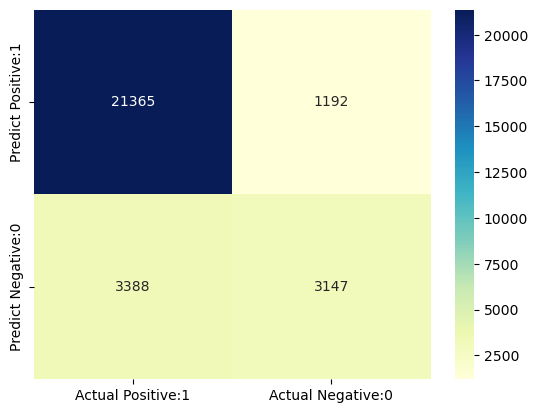

In [52]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     22557
         Yes       0.73      0.48      0.58      6535

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [54]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [55]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8426


In [56]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7253


## Kfold cross validation

In [57]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores:[0.84222738 0.8448913  0.84609435 0.84015812 0.84342371]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
